In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/C++ Placement/ML/passwords.csv', error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0])

In [4]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isna().sum()

password    0
strength    0
dtype: int64

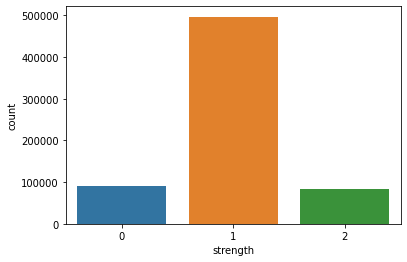

In [6]:
sns.countplot(data['strength'])
# imbalance dataset

In [7]:
password_tuple = np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [8]:
import random
random.shuffle(password_tuple)

In [9]:
x = [lebels[0] for lebels in password_tuple]
y = [lebels[1] for lebels in password_tuple]

In [10]:
print(x[:100])
print(y[:100])

['kzde5577', 'kino3434', 'visi7k1yr', 'megzy123', 'kzde5577', 'megzy123', 'lamborghin1', 'megzy123', 'visi7k1yr', 'lamborghin1', 'AVYq1lDE4MgAZfNt', 'asv5o9yu', 'u6c8vhow', '612035180tok', 'v1118714', 'kino3434', '52558000aaa', 'v1118714', 'g067057895', 'g067057895', 'megzy123', 'as326159', 'jerusalem393', 'idofo673', 'visi7k1yr', 'faranumar91', 'faranumar91', 'kzde5577', 'sbl571017', 'v1118714', 'schalke04', 'AVYq1lDE4MgAZfNt', 'trabajonet9', 'go7kew7a2po', 'idofo673', 'czuodhj972', 'czuodhj972', 'kzde5577', '0169395484a', 'memjan123', 'visi7k1yr', 'asgaliu11', 'u6c8vhow', '612035180tok', 'czuodhj972', 'as326159', 'jytifok873', 'gaymaids1', 'cigicigi123', 'pHyqueDIyNQ8vmhb', 'TyWM72UNEex8Q8Y', 'asgaliu11', 'jytifok873', 'openup12', 'kino3434', 'yitbos77', 'ok>bdk', 'fk9qi21m', 'klara-tershina3H', 'universe2908', 'alimagik1', 'sbl571017', 'hpqkoxsn5', 'WUt9IZzE0OQ7PkNE', 'lsdlsd1', 'elyass15@ajilent-ci', 'ejeko677', 'asgaliu11', '52558000aaa', 'rntprns7', 'c3h8bkzr', 'cesarmaio1', 'yk5

### TF-IDF vectorization

Here we are using TF-IDF method to vectorize the passwords.

In [33]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [13]:
X=vectorizer.fit_transform(x)
X.shape

(669639, 132)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_test.shape

(133928, 132)

### Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,multi_class='multinomial', max_iter=500)

In [142]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
dt=np.array(['abcde'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([0])

In [144]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 2])

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy is:")
print(accuracy_score(y_test,y_pred))

print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[ 5487 12345    14]
 [ 3834 93223  2539]
 [   29  5075 11382]]
Accuracy is:
0.8220237739681022
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.31      0.40     17846
           1       0.84      0.94      0.89     99596
           2       0.82      0.69      0.75     16486

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.81      0.82      0.81    133928



### Desicion Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred=dtree.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy is:")
print(accuracy_score(y_test,y_pred))

print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[16924   973    65]
 [  969 98019   687]
 [  122   710 15459]]
Accuracy is:
0.9736724210023296
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17962
           1       0.98      0.98      0.98     99675
           2       0.95      0.95      0.95     16291

    accuracy                           0.97    133928
   macro avg       0.96      0.96      0.96    133928
weighted avg       0.97      0.97      0.97    133928



### Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=200)

In [30]:
rfc.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred=rfc.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy is:")
print(accuracy_score(y_test,y_pred))

print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[17956     6     0]
 [   10 99665     0]
 [    0     0 16291]]
Accuracy is:
0.9998805328236067
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17962
           1       1.00      1.00      1.00     99675
           2       1.00      1.00      1.00     16291

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



### K Nearest Neighbour Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn = KNeighborsClassifier(n_neighbors=1)

In [137]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [138]:
X_temp = X_test[:100]
print(X_temp.shape)

(100, 132)


In [139]:
y_pred = knn.predict(X_temp)

In [140]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix:")
#cm=confusion_matrix(y_test,y_pred)
#print(cm)
print("Accuracy is:")
print(accuracy_score(y_test[:100],y_pred))

print("Classification Report:")
from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

Confusion Matrix:
Accuracy is:
0.88
Classification Report:


In [112]:
errors = []

for i in range(1,500, 10):
  knn = KNeighborsClassifier(n_neighbors=int(i))
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test[:100])
  errors.append(accuracy_score(y_test[:100],y_pred))

In [108]:
import matplotlib.pyplot as plt

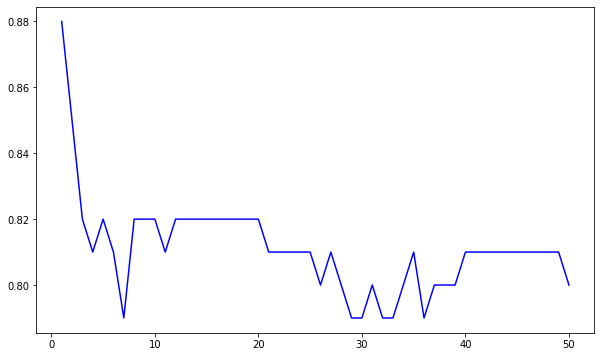

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(errors)+1), errors, color="blue")